# POSTTEST 5

### Import Library

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('Fifa 23 Players Data.csv')
df

# A. SUPERVISED LEARNING 
***

Mengambil 2 fitur kemudian pisahkan fitur x dan label y

In [29]:
X = df[['Overall', 'Age']]
y = df['Preferred Foot']

Memetakan kelas target ke label biner

In [30]:
y = np.where(y == 'Right', 1, -1)

Membagi data (split) ke train set dan test set

In [31]:
from sklearn.model_selection import train_test_split

# Assuming X and y are appropriately formatted and not singleton arrays
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Membuat Objek Classifier SVM

In [32]:
svm = SVC(kernel="rbf")

Melatih classifier dengan data train

In [33]:
svm.fit(X_train, y_train)

SVC()

In [34]:
y_pred = svm.predict(X_test)

Menyimpan nilai support vector dan indeksnya

In [37]:
support_vectors = svm.support_vectors_
support_vector_indices = np.where(np.isin(X_train, support_vectors).all(axis=1))

Plotting menggunakan scatter dari Seaborn

C:\Users\NITRO 5\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


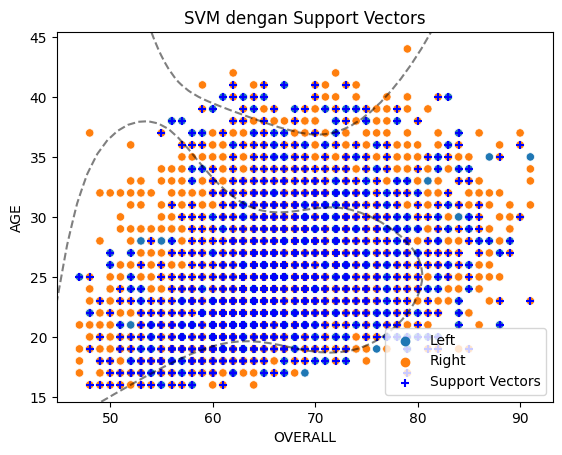

In [38]:
sns.scatterplot(x='Overall', y='Age', hue='Preferred Foot', data=df)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=40, color='blue', marker='+', label='Support Vectors')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1]), np.linspace(ylim[0], ylim[1]))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
linestyles=['--', '-', '--'])
plt.xlabel('OVERALL')
plt.ylabel('AGE')
plt.legend(loc='lower right')
plt.title('SVM dengan Support Vectors')
plt.show()


Melihat 4 nilai metriks dengan menggunakan library dari Scikit-Learn yaitu Classification Report.

In [56]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          48       0.00      0.00      0.00        10
          49       0.00      0.00      0.00         7
          50       0.00      0.00      0.00        24
          51       0.00      0.00      0.00        28
          52       0.00      0.00      0.00        34
          53       0.00      0.00      0.00        53
          54       0.00      0.00      0.00        45
          55       0.00      0.00      0.00        65
          56       0.00      0.00      0.00        74
          57       0.00      0.00      0.00        58
          58       0.00      0.00      0.00       109
          59       0.00      0.00      0.00       105
          60       0.00      0.00      0.00       149
          61       0.00      0.00      0.00       165
          62       0.00      0.00      0.00       172
          63       0.07      0.54      0.12       228
          64       0.00      0.00      0.00       248
          65       0.07    

C:\Users\NITRO 5\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NITRO 5\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NITRO 5\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

melakukan prediksi data test dengan model dan menampilkan hasil

In [59]:
y_pred = svm.predict(X_test)
print("MAE       :", mean_absolute_error(y_test, y_pred))
print("MSE       :", mean_squared_error(y_test, y_pred))
print("RMSE      :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-Squared :", r2_score(y_test, y_pred))

MAE       : 4.966558791801511
MSE       : 40.722761596548004
RMSE      : 6.381438834349821
R-Squared : 0.10817258645992722


### Linear Regression

Memisahkan fitur dan target dari dataset

In [40]:
X, y = df[['Age']], df['Overall']

Membagi data fitur dan target menjadi data training

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

Membuat model regresi linear, melatih model dengan data training dan menggunakan model untuk membuat prediksi pada data test

In [42]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

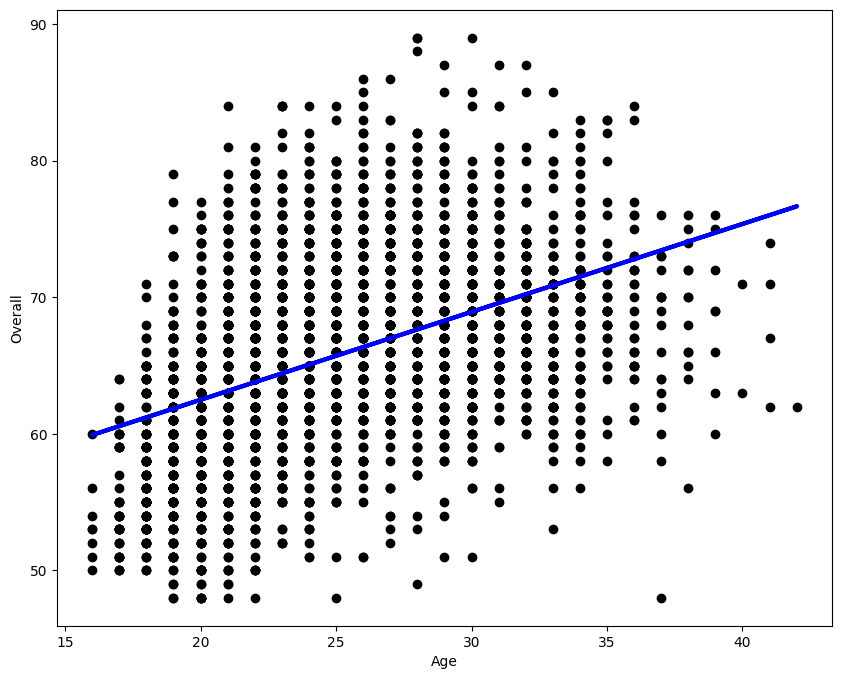

In [43]:
plt.figure(figsize=(10,8))
plt.plot(X_test, y_pred, c='blue', linewidth=3)
plt.scatter(X_test, y_test, c='Black')
plt.xlabel("Age")
plt.ylabel("Overall")
plt.show()

In [44]:
svm = SVC(kernel="linear")

In [45]:
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [46]:
y_pred = svm.predict(X_test)
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-Squared :", r2_score(y_test, y_pred))

MAE : 4.966558791801511
MSE : 40.722761596548004
RMSE : 6.381438834349821
R-Squared : 0.10817258645992722


# B. UNSUPERVISED LEARNING
***

### B1. Implementasikan metode K-Means

Menggunakan fitur x dan menentukan banyaknya kelompok

In [47]:
X = df[["Age", "Overall"]]
K = 2

Inisialisasi K-Means dan melatih model K-Means berdasarkan data X

In [48]:
kmeans = KMeans(n_clusters=K, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=2, n_init=10)

In [49]:
cluster_labels = kmeans.labels_
df["cluster"] = cluster_labels
centroids = kmeans.cluster_centers_

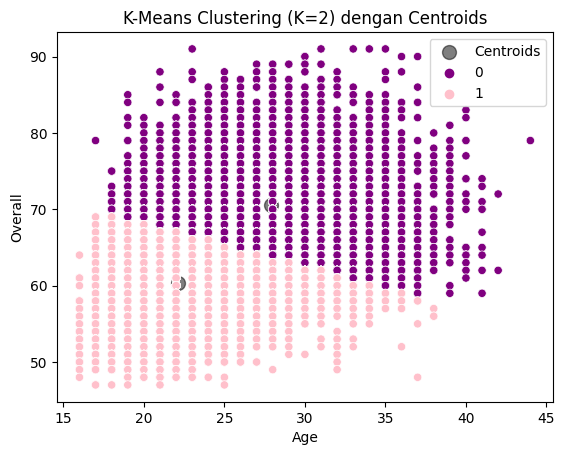

In [50]:
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='black', s=100, label='Centroids')
sns.scatterplot(data=df, x="Age", y="Overall", hue="cluster", palette=["purple", "pink"])
plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel("Age")
plt.ylabel("Overall")
plt.legend()
plt.show()

Membuat crosstab untuk membandingkan cluster labels dengan true labels

In [51]:
cross_tab = pd.crosstab(df["cluster"], df["Preferred Foot"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

Cross-Tabulation:
Preferred Foot  Left  Right
cluster                    
0               2500   7474
1               1994   6571 



In [52]:
ari = adjusted_rand_score(df["Preferred Foot"], cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

Adjusted Rand Index (ARI): -0.00


In [53]:
true_labels_num = df["Preferred Foot"].astype("category").cat.codes
nmi = normalized_mutual_info_score(true_labels_num, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")

Normalized Mutual Information (NMI): 0.00


In [54]:
homogeneity = homogeneity_score(df["Preferred Foot"], cluster_labels)
completeness = completeness_score(df["Preferred Foot"], cluster_labels)
v_measure = v_measure_score(df["Preferred Foot"], cluster_labels)
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Homogeneity Score: 0.00
Completeness Score: 0.00
V-Measure Score: 0.00
